In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

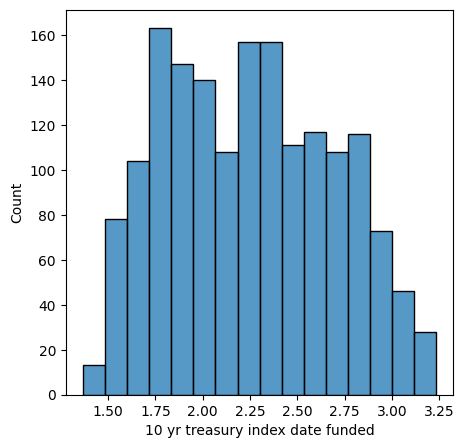

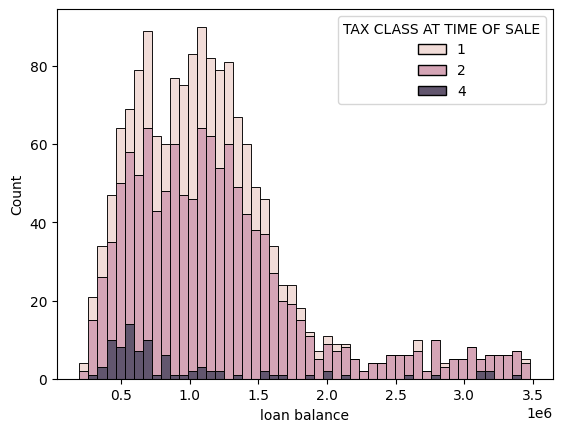

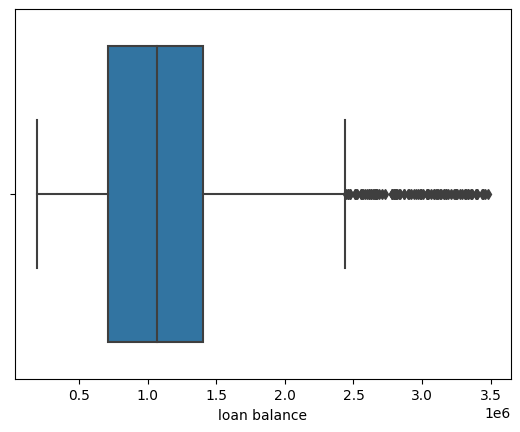

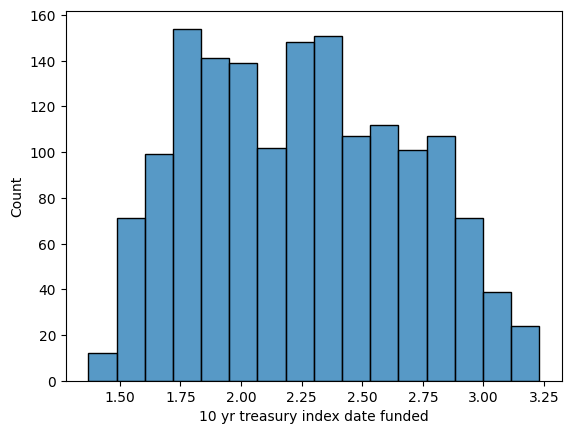

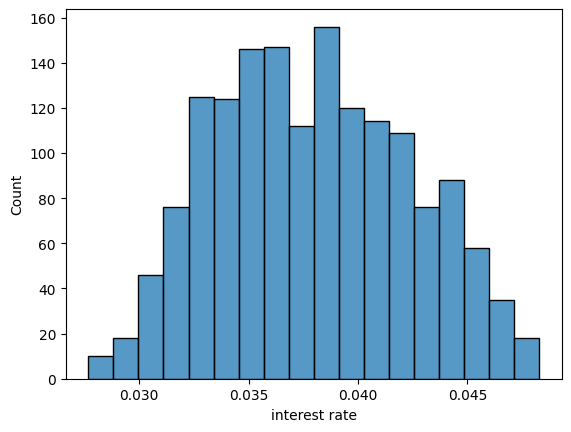

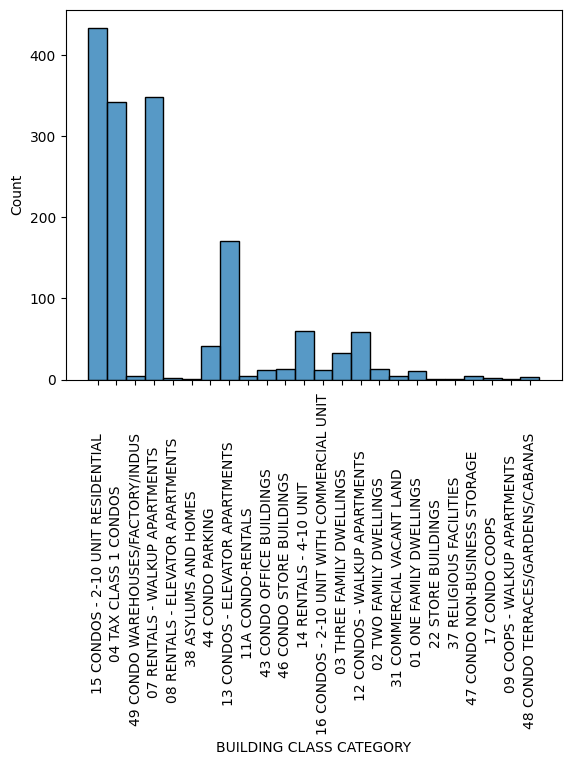

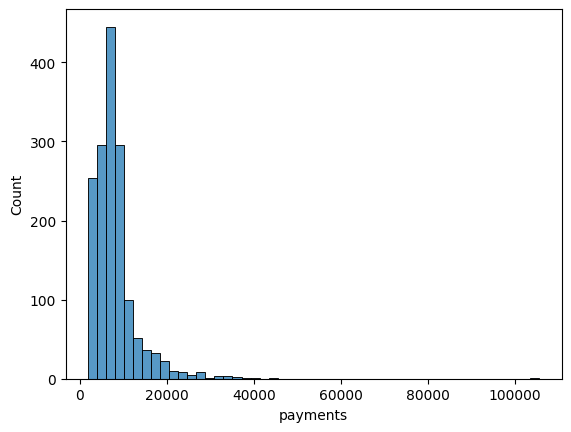

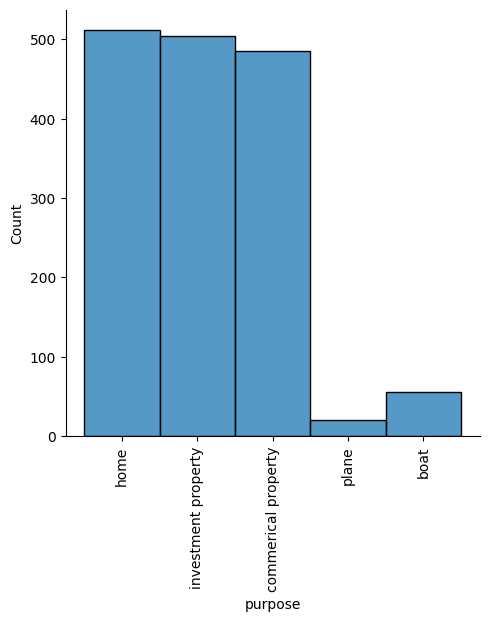

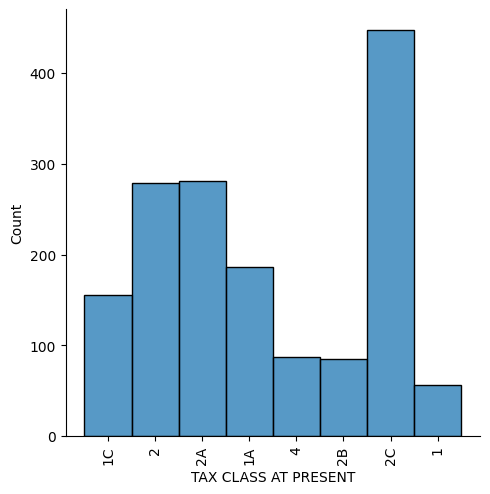

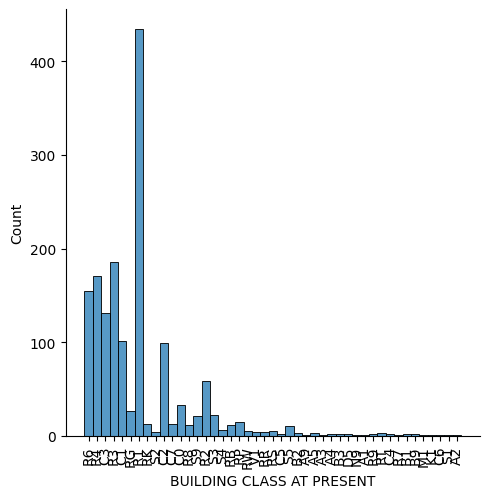

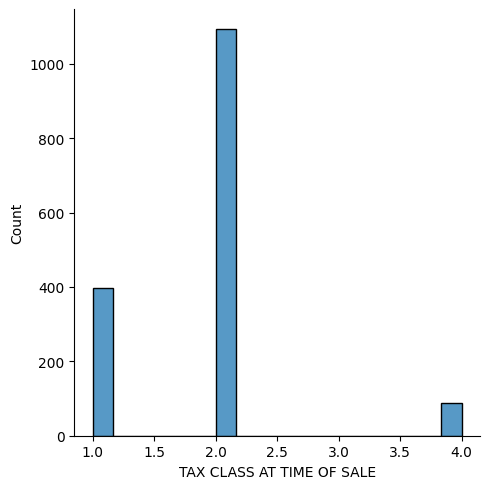

<Figure size 1000x1000 with 0 Axes>

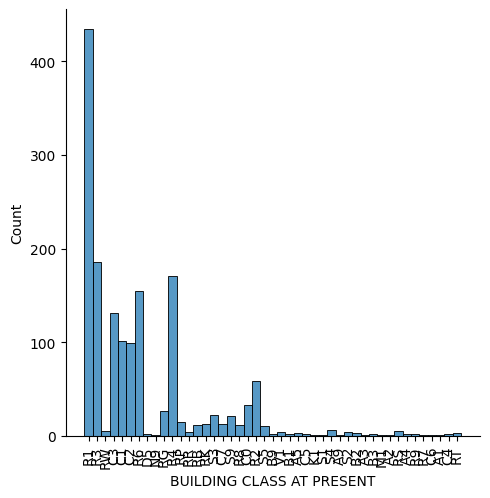

In [3]:
%run 01_luxury_loan_amount(monovariable_analysis).ipynb

In [4]:
df_processed

funded_amount funded_date  duration years  duration months  \
0          790000.0  2012-04-27              20              240   
1         1720000.0  2014-10-14              15              180   
3         1079000.0  2012-02-23              20              240   
4         2028000.0  2016-04-01              20              240   
5          612000.0  2017-10-26              20              240   
...             ...         ...             ...              ...   
1673       528000.0  2012-11-10              20              240   
1674       885000.0  2015-08-16              20              240   
1675      1530000.0  2014-09-01              20              240   
1676       897000.0  2014-02-14              15              180   
1677      1656000.0  2016-07-12              15              180   

      10 yr treasury index date funded  interest rate  payments  \
0                               1.9600        0.03359   4524.65   
1                               2.2100        0.03508  12302.74   
3                               1.9900        0.03389   6196.40   
4                               1.7900        0.03188  11439.05   
5                               2.4609        0.03860   3663.61   
...                                ...            ...       ...   
1673                            1.6100        0.03009   2930.65   
1674                            2.2000        0.03599   5177.78   
1675                            2.3500        0.03748   9069.60   
1676                            2.7500        0.04049   6657.05   
1677                            1.5300        0.02828  11299.54   

      total past payments  loan balance  property value purpose  \
0                      92     373732.18        930250.0    boat   
1                      62     957230.24       1995250.0    boat   
3                      94     496538.75       1402450.0    boat   
4                      45    1513242.57       2216500.0    boat   
5                      26     516746.19        711850.0    boat   
...                   ...           ...             ...     ...   
1673                   85     278894.35        778400.0   plane   
1674                   52     615755.47       1084950.0   plane   
1675                   64     949545.68       1627400.0   plane   
1676                   70     431006.63       1184350.0   plane   
1677                   41    1192718.78       1779400.0   plane   

                                     title  employment length  \
0     Vice President Global Field Services                  6   
1                  Senior program manager                  10   
3                            Vice presiden                 17   
4                           Bank examiner                   5   
5     Senior Director of Video Programming                  3   
...                                    ...                ...   
1673                       franchise owner                  3   
1674               Chief Operating Officer                 13   
1675                       Owner/physician                 10   
1676                        General Manger                  5   
1677       Vice President, Capital Markets                  8   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      15 CONDOS - 2-10 UNIT RESIDENTIAL                             2C   
1      04 TAX CLASS 1 CONDOS                                         1A   
3      15 CONDOS - 2-10 UNIT RESIDENTIAL                             2C   
4      49 CONDO WAREHOUSES/FACTORY/INDUS                              4   
5      07 RENTALS - WALKUP APARTMENTS                                2A   
...                                            ...                  ...   
1673   04 TAX CLASS 1 CONDOS                                         1C   
1674   04 TAX CLASS 1 CONDOS                                         1C   
1675   04 TAX CLASS 1 CONDOS                                         1C   
1676  11A CONDO-RENTALS                         

## columns filtering

In [5]:
#TAX CLASS AT TIME OF SALE (grupo 1 and grupo 2 separate) 
df_TCATOS = df_processed['TAX CLASS AT TIME OF SALE']==1
df_TCATOS_1 =df_processed[df_TCATOS]
df_TCATOS_1

funded_amount funded_date  duration years  duration months  \
1         1720000.0  2014-10-14              15              180   
15         728000.0  2017-12-19              20              240   
18        1290000.0  2012-09-17              20              240   
24         688000.0  2016-12-07              20              240   
44        1330000.0  2016-01-08              15              180   
...             ...         ...             ...              ...   
1652      3240000.0  2018-06-05              10              120   
1664      1200000.0  2017-06-11              15              180   
1673       528000.0  2012-11-10              20              240   
1674       885000.0  2015-08-16              20              240   
1675      1530000.0  2014-09-01              20              240   

      10 yr treasury index date funded  interest rate  payments  \
1                               2.2100        0.03508  12302.74   
15                              2.4600        0.03859   4357.64   
18                              1.8500        0.03249   7316.17   
24                              2.3401        0.03739   4075.13   
44                              2.1300        0.03429   9461.63   
...                                ...            ...       ...   
1652                            2.9200        0.04117  32983.89   
1664                            2.2005        0.03499   8578.00   
1673                            1.6100        0.03009   2930.65   
1674                            2.2000        0.03599   5177.78   
1675                            2.3500        0.03748   9069.60   

      total past payments  loan balance  property value purpose  \
1                      62     957230.24       1995250.0    boat   
15                     24     623416.73        825150.0    boat   
18                     87     653493.12       1603100.0    boat   
24                     36     541295.17        864000.0    boat   
44                     47     885303.25       1522700.0    boat   
...                   ...           ...             ...     ...   
1652                   18    2646290.02       3268750.0   plane   
1664                   30     942659.96       1366700.0   plane   
1673                   85     278894.35        778400.0   plane   
1674                   52     615755.47       1084950.0   plane   
1675                   64     949545.68       1627400.0   plane   

                          title  employment length  \
1       Senior program manager                  10   
15                      Realtor                 13   
18       Owner/Partner+Landlord                  4   
24                  HOSPITALIST                 10   
44    Principal Project Manager                 15   
...                         ...                ...   
1652  SR VP National Operations                  7   
1664         Principal Engineer                 16   
1673            franchise owner                  3   
1674    Chief Operating Officer                 13   
1675            Owner/physician                 10   

                          BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
1     04 TAX CLASS 1 CONDOS                                         1A   
15    04 TAX CLASS 1 CONDOS                                         1A   
18    04 TAX CLASS 1 CONDOS                                         1A   
24    04 TAX CLASS 1 CONDOS                                         1C   
44    04 TAX CLASS 1 CONDOS                                         1C   
...                                           ...                  ...   
1652  04 TAX CLASS 1 CONDOS                                         1A   
1664  04 TAX CLASS 1 CONDOS                                         1C   
1673  04 TAX CLASS 1 CONDOS                                         1C   
1674  04 TAX CLASS 1 CONDOS                                         1C   
1675  04 TAX CLASS 1 CONDOS                                         1C   

     BUILDING CLASS AT PRESENT  TOTAL UNI

In [6]:
df_TCATOS = df_processed['TAX CLASS AT TIME OF SALE']==2
df_TCATOS_2 = df_processed[df_TCATOS]
df_TCATOS_2.drop(['TAX CLASS AT TIME OF SALE','title','duration years','employment length'],axis=1,inplace = True)
df_TCATOS_2

C:\Users\Cristian Durango\AppData\Local\Temp\ipykernel_15808\2143128235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TCATOS_2.drop(['TAX CLASS AT TIME OF SALE','title','duration years','employment length'],axis=1,inplace = True)


funded_amount funded_date  duration months  \
0          790000.0  2012-04-27              240   
3         1079000.0  2012-02-23              240   
5          612000.0  2017-10-26              240   
6          630000.0  2017-12-07              180   
7          795000.0  2017-10-06              240   
...             ...         ...              ...   
1670      2052000.0  2015-11-08              180   
1671       580000.0  2012-09-14              240   
1672      1310000.0  2019-02-01              240   
1676       897000.0  2014-02-14              180   
1677      1656000.0  2016-07-12              180   

      10 yr treasury index date funded  interest rate  payments  \
0                               1.9600        0.03359   4524.65   
3                               1.9900        0.03389   6196.40   
5                               2.4609        0.03860   3663.61   
6                               2.3700        0.03669   4556.23   
7                               2.3589        0.03758   4716.77   
...                                ...            ...       ...   
1670                            2.3400        0.03638  14808.84   
1671                            1.8800        0.03279   3298.27   
1672                            2.7000        0.04099   8006.85   
1676                            2.7500        0.04049   6657.05   
1677                            1.5300        0.02828  11299.54   

      total past payments  loan balance  property value purpose  \
0                      92     373732.18        930250.0    boat   
3                      94     496538.75       1402450.0    boat   
5                      26     516746.19        711850.0    boat   
6                      24     520650.57        667750.0    boat   
7                      26     672363.91        895850.0    boat   
...                   ...           ...             ...     ...   
1670                   49    1326366.60       2187750.0   plane   
1671                   87     293050.18        833250.0   plane   
1672                   11    1221924.69       1446700.0   plane   
1676                   70     431006.63       1184350.0   plane   
1677                   41    1192718.78       1779400.0   plane   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      15 CONDOS - 2-10 UNIT RESIDENTIAL                             2C   
3      15 CONDOS - 2-10 UNIT RESIDENTIAL                             2C   
5      07 RENTALS - WALKUP APARTMENTS                                2A   
6      15 CONDOS - 2-10 UNIT RESIDENTIAL                             2C   
7      15 CONDOS - 2-10 UNIT RESIDENTIAL                             2C   
...                                            ...                  ...   
1670   15 CONDOS - 2-10 UNIT RESIDENTIAL                             2C   
1671   15 CONDOS - 2-10 UNIT RESIDENTIAL                             2C   
1672   07 RENTALS - WALKUP APARTMENTS                                2A   
1676  11A CONDO-RENTALS                                               2   
1677   16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT                    2C   

     BUILDING CLASS AT PRESENT  TOTAL UNITS LAND SQUARE FEET GROSS SQUARE FEET  
0                           R1            1                0                 0  
3                           R1            1                0                 0  
5                           C3            4             3194              3296  
6                           R1            1                0                 0  
7                           R1            1                0                 0  
...                        ...          ...              ...               ...  
1670                        R1            1                0                 0  
1671                        R1            1                0                 0  
1672                        C3            4             2610              3344  
1676                        RR           11                0

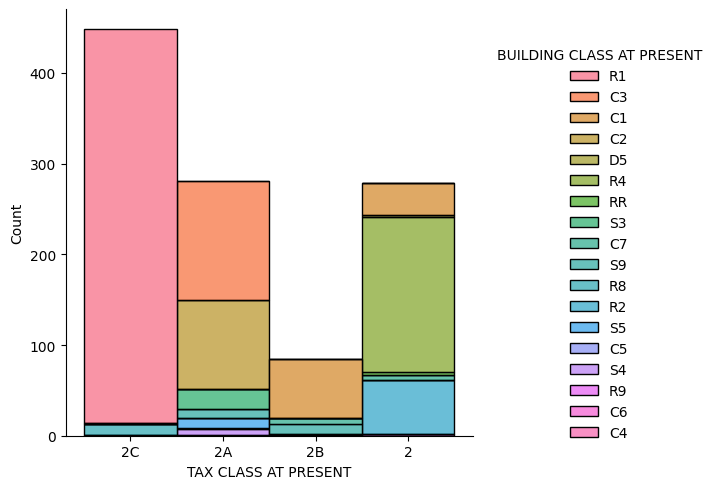

In [7]:
sns.displot(data = df_TCATOS_2,x = 'TAX CLASS AT PRESENT',hue = 'BUILDING CLASS AT PRESENT',multiple = 'stack')

In [8]:
df_TCATOS_2.describe()

funded_amount  duration months  10 yr treasury index date funded  \
count   1.093000e+03      1093.000000                       1093.000000   
mean    1.670779e+06       326.349497                          2.248930   
std     9.614104e+05        69.120154                          0.434561   
min     4.400000e+05       120.000000                          1.400000   
25%     1.130000e+06       360.000000                          1.880000   
50%     1.530000e+06       360.000000                          2.240000   
75%     1.848000e+06       360.000000                          2.591600   
max     1.050800e+07       360.000000                          3.230000   

       interest rate       payments  total past payments  loan balance  \
count    1093.000000    1093.000000          1093.000000  1.093000e+03   
mean        0.037911    8636.780494            48.639524  1.228389e+06   
std         0.004450    5932.804749            28.226581  6.590866e+05   
min         0.027680    1962.170000             0.000000  2.209654e+05   
25%         0.034380    5437.350000            24.000000  7.566427e+05   
50%         0.037800    7513.510000            49.000000  1.123149e+06   
75%         0.041380    9775.440000            73.000000  1.473875e+06   
max         0.048280  105486.810000            95.000000  3.482132e+06   

       property value  TOTAL UNITS  
count    1.093000e+03  1093.000000  
mean     1.835418e+06     3.408051  
std      9.742446e+05     5.053560  
min      4.732000e+05     1.000000  
25%      1.270450e+06     1.000000  
50%      1.704650e+06     1.000000  
75%      2.024550e+06     4.000000  
max      1.080030e+07    72.000000

C:\Users\Cristian Durango\AppData\Local\Temp\ipykernel_15808\35044027.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_TCATOS_2.corr(),annot=True)


<Axes: >

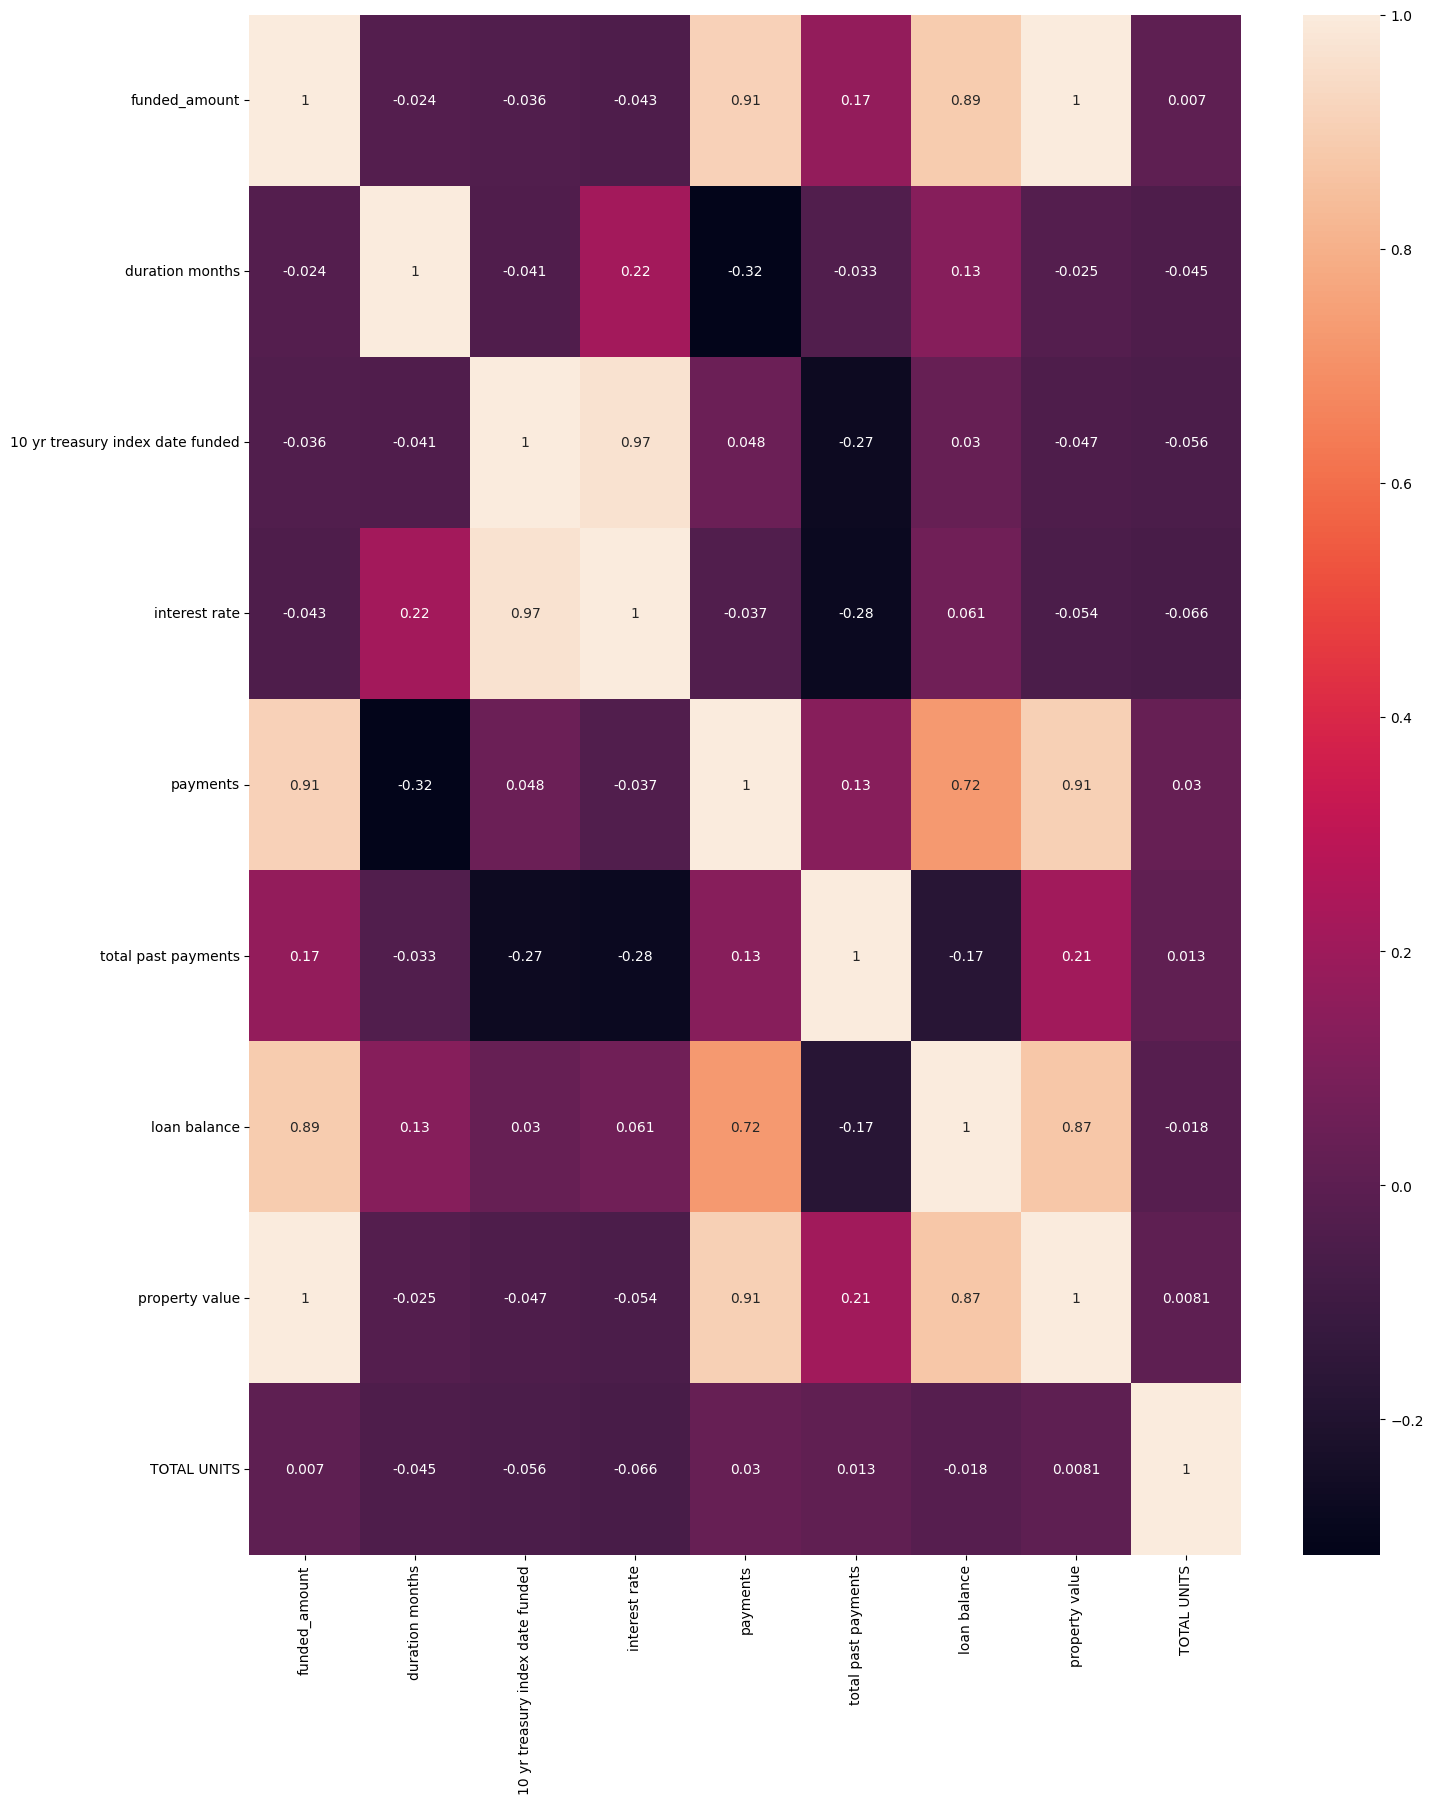

In [9]:
plt.figure(figsize=(16,20))
sns.heatmap(df_TCATOS_2.corr(),annot=True)

## Data frame for linear regression: 
- loan balance
- property value
- payments
- funded_amount
- duration years
- interes rate

<Axes: xlabel='loan balance', ylabel='property value'>

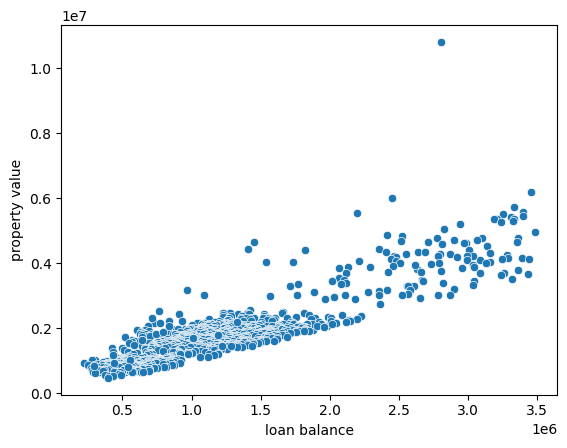

In [10]:
sns.scatterplot(data=df_TCATOS_2,x='loan balance',y = 'property value')

## Funded amount

In [11]:
X_0 = df_TCATOS_2[['property value', 'loan balance']]
y = df_TCATOS_2['funded_amount'].values.reshape(-1,1)

sc_x_0 = StandardScaler()
sc_y = StandardScaler()

x_std_0 = sc_x_0.fit_transform(X_0)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std_0,y_std)

interest_rate = 0.03389
property_value = 2216500
loan_balance = 1513242.57
duration_months = 20*12
total_past_payments = 45
funded_amount = 2028000.0
payments = 11439.05
ten_yr_index = 1.79

funded_amount_std = sc_x_0.transform(np.array([property_value, loan_balance]).reshape(-1,2))
sc_y.inverse_transform(slr.predict(funded_amount_std))

C:\Users\Cristian Durango\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[2053205.34353552]])

In [12]:
sc_y = sc_y.inverse_transform(slr.predict(funded_amount_std)).reshape(-1,1)
funded_amount/sc_y[0][0]

0.987723905154017

In [13]:
X_1 = df_TCATOS_2[['property value', 'loan balance','interest rate','10 yr treasury index date funded']]
y = df_TCATOS_2['funded_amount'].values.reshape(-1,1)

sc_x_1 = StandardScaler()
sc_y = StandardScaler()

x_std_1 = sc_x_1.fit_transform(X_1)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std_1,y_std)

funded_amount_std = sc_x_1.transform(np.array([property_value, loan_balance, interest_rate, ten_yr_index]).reshape(-1,4))
sc_y.inverse_transform(slr.predict(funded_amount_std))

C:\Users\Cristian Durango\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[2043921.83272952]])

In [14]:
sc_y = sc_y.inverse_transform(slr.predict(funded_amount_std)).reshape(-1,1)
funded_amount/sc_y[0][0]

0.9922101557532389

## Loan balance

In [15]:
X_1 = df_TCATOS_2[['property value', 'payments', 'funded_amount','interest rate']]
y = df_TCATOS_2['loan balance'].values.reshape(-1,1)

sc_x_1 = StandardScaler()
sc_y = StandardScaler()

x_std_1 = sc_x_1.fit_transform(X_1)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std_1,y_std)

loan_balance_std = sc_x_1.transform(np.array([property_value, payments, funded_amount,interest_rate]).reshape(-1,4))
sc_y.inverse_transform(slr.predict(loan_balance_std))

C:\Users\Cristian Durango\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1325078.03444474]])

In [16]:
value = sc_y.inverse_transform(slr.predict(loan_balance_std)).reshape(-1,1)
value[0][0]/loan_balance

0.8756547434723189

## Property value

In [17]:
X_1 = df_TCATOS_2[['loan balance', 'interest rate','funded_amount','10 yr treasury index date funded']]
y = df_TCATOS_2['property value'].values.reshape(-1,1)

sc_x_1 = StandardScaler()
sc_y = StandardScaler()

x_std_1 = sc_x_1.fit_transform(X_1)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std_1,y_std)

property_value_std = sc_x_1.transform(np.array([loan_balance, interest_rate, funded_amount, ten_yr_index]).reshape(-1,4))
sc_y.inverse_transform(slr.predict(property_value_std))

C:\Users\Cristian Durango\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[2199471.19371883]])

In [18]:
value = sc_y.inverse_transform(slr.predict(property_value_std)).reshape(-1,1)
value[0][0]/property_value

0.992317254102788

## Interest rate

In [19]:
X_1 = df_TCATOS_2[['loan balance','funded_amount','duration months','10 yr treasury index date funded']]
y = df_TCATOS_2['interest rate'].values.reshape(-1,1)

sc_x_1 = StandardScaler()
sc_y = StandardScaler()

x_std_1 = sc_x_1.fit_transform(X_1)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std_1,y_std)

interest_rate_std = sc_x_1.transform(np.array([loan_balance, funded_amount, duration_months, ten_yr_index]).reshape(-1,4))
sc_y.inverse_transform(slr.predict(property_value_std))

C:\Users\Cristian Durango\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.03375841]])

In [20]:
value = sc_y.inverse_transform(slr.predict(interest_rate_std)).reshape(-1,1)
value[0][0]/interest_rate

0.940661867607938

## Logistic regression
### Tax class at present

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578 entries, 1585 to 913
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   funded_amount                     1578 non-null   float64
 1   funded_date                       1578 non-null   object 
 2   duration years                    1578 non-null   int64  
 3   duration months                   1578 non-null   int64  
 4   10 yr treasury index date funded  1578 non-null   float64
 5   interest rate                     1578 non-null   float64
 6   payments                          1578 non-null   float64
 7   total past payments               1578 non-null   int64  
 8   loan balance                      1578 non-null   float64
 9   property value                    1578 non-null   float64
 10  purpose                           1578 non-null   object 
 11  title                             1578 non-null   object 
 12  empl

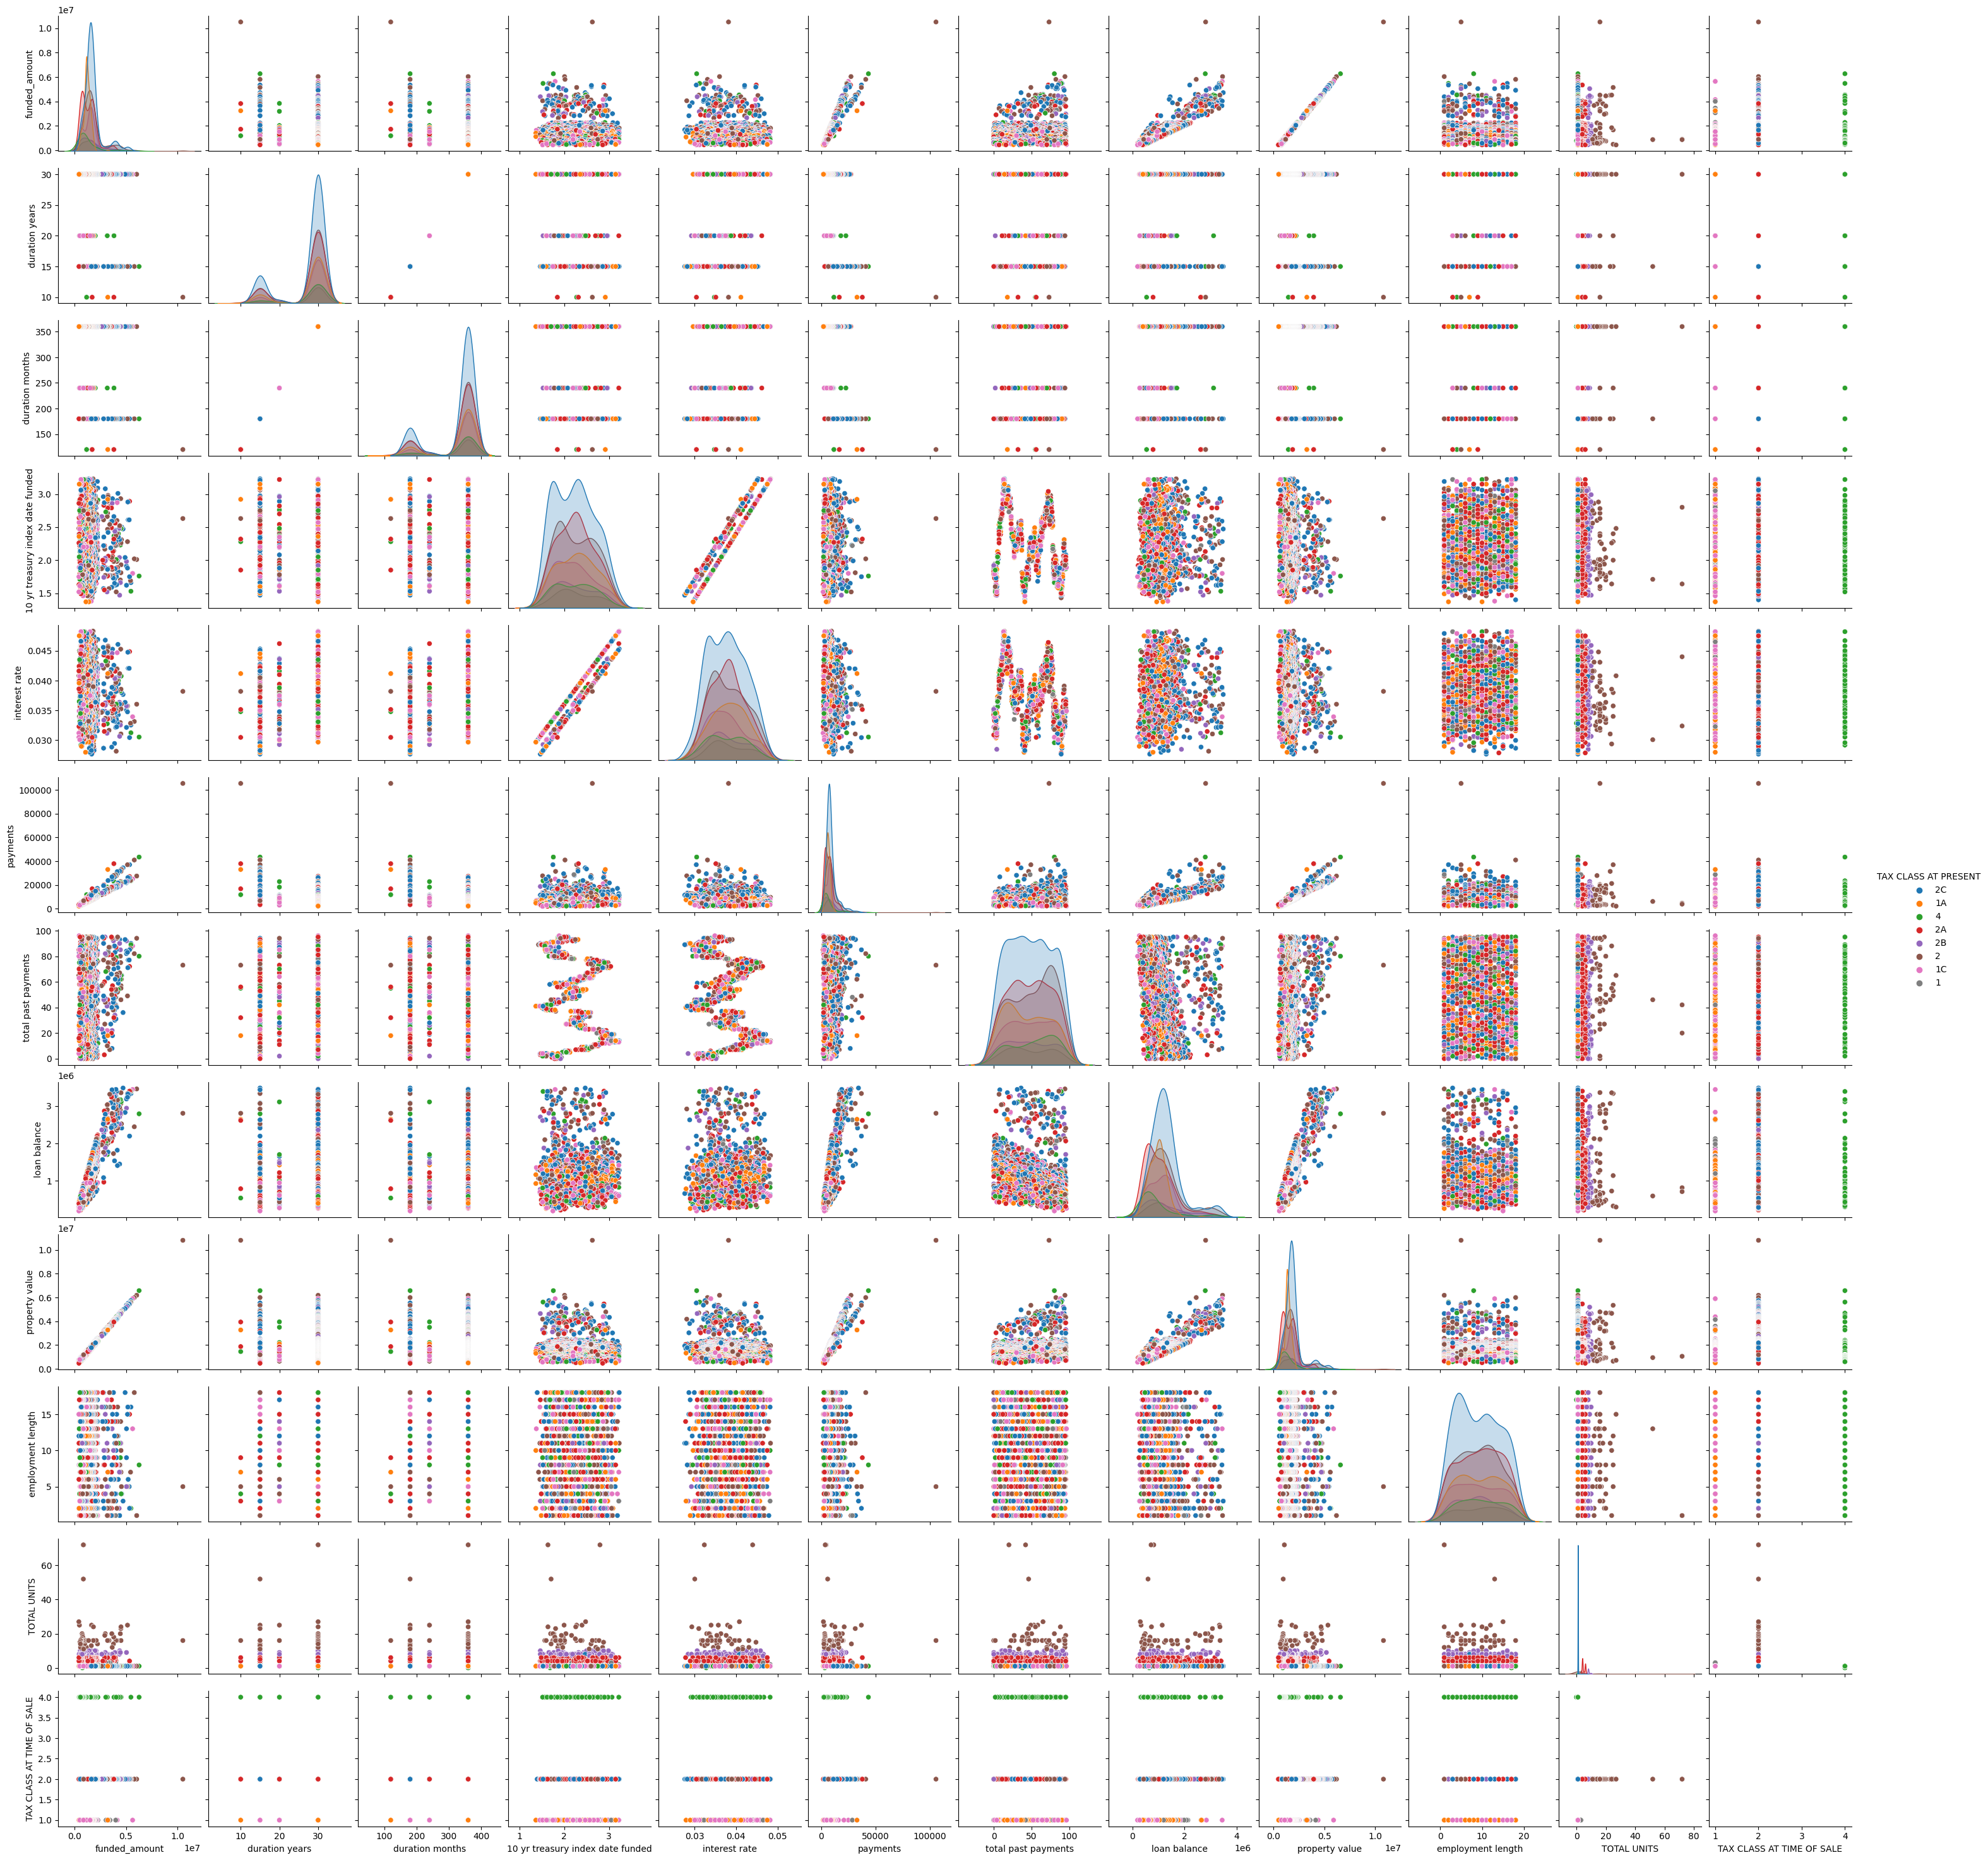

In [22]:
sns.pairplot(df_processed,hue='TAX CLASS AT PRESENT')
plt.show()

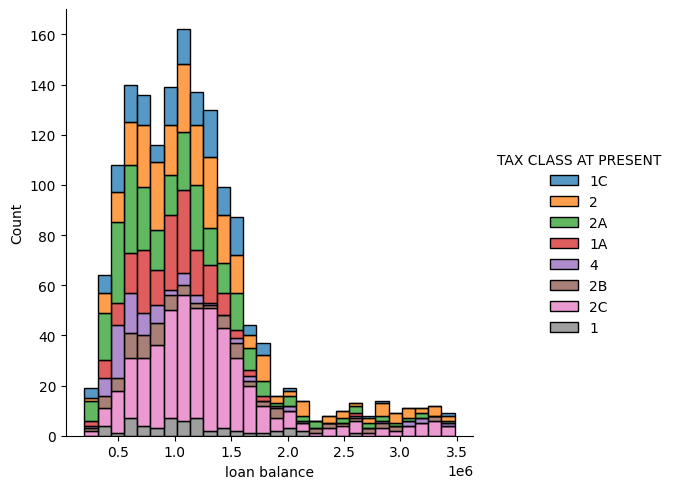

In [23]:
sns.displot(df_final,x= 'loan balance',hue= 'TAX CLASS AT PRESENT',multiple = 'stack')
plt.show()

In [24]:
X_class= df_final.drop(['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS CATEGORY', 'purpose', 'funded_date', 'title'],axis=1)
y_class = df_final['TAX CLASS AT PRESENT']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, random_state=42, shuffle=True, test_size=0.2)
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.fit_transform(X_test)

In [26]:
model_TCATOS = LogisticRegression(random_state=42, solver='saga', multi_class= 'multinomial', n_jobs= -1)